In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

plt.figure(dpi=500)
from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 3200x2400 with 0 Axes>

# 2. Data Exploration

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/bank-marketing-data.csv')
print(f"Shape of Data :{df.shape}")

Shape of Data :(8950, 18)


In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
df.sample(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1498  C11549  2619.752921           1.000000    3563.07           2675.63   
714   C10741   821.916526           0.857143    1386.40           1386.40   
6331  C16506   829.410423           1.000000    3884.68           2610.57   
5926  C16092  1700.753811           1.000000       0.00              0.00   
1864  C11926  4379.015578           1.000000     996.64            860.50   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1498                  887.44      0.000000             0.916667   
714                     0.00      0.000000             0.285714   
6331                 1274.11      0.000000             1.000000   
5926                    0.00    624.480873             0.000000   
1864                  136.14   3632.137219             0.916667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1498                    0.666667                          0.666667   
714                     0.285714                          0.000000   
6331                    1.000000                          1.000000   
5926                    0.000000                          0.000000   
1864                    0.666667                          0.416667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1498                0.000000                 0             69        4500.0   
714                 0.000000                 0              3        1500.0   
6331                0.000000                 0             84        8000.0   
5926                0.500000                 9              0        2000.0   
1864                0.333333                 4             27       14500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1498  1227.952887        688.645056               0.0      12  
714    238.348011        154.555561               0.0       7  
6331  3517.817878        200.202740               0.0      12  
5926   418.596666        434.688783               0.0      12  
1864  2034.929239       1064.251367               0.0      12

In [ ]:
df = df.set_index("CUST_ID")

In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000               NaN          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

## 2.1 Data Summary

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

## 2.2 Data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

# 2.3 Missing values check

In [ ]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- There are 313 missing values 8950 observation in `MINIMUM_PAYMENTS`
- 1 missing value in the `CREDIT_LIMIT`

## 2.4 Duplicates Check

In [ ]:
df.duplicated().any()

False

No duplicates in the data

## 2.5 MINIMUM_PAYMENTS

Generating descriptive statistics for the subset of rows in the DataFrame df where the MINIMUM_PAYMENTS column has missing values.

In [ ]:
df[df["MINIMUM_PAYMENTS"].isnull()].describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   313.000000         313.000000   313.000000        313.000000   
mean    555.441321           0.389403   393.087284        250.433387   
std    1292.687887           0.408341   757.905701        624.453991   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.187069           0.090909     1.400000          0.000000   
50%      16.848358           0.181818   130.400000          0.000000   
75%     286.686616           1.000000   399.950000        176.030000   
max    9164.724752           1.000000  7597.090000       6761.290000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              313.000000    313.000000           313.000000   
mean               142.653898    559.136698             0.336043   
std                311.289043   1185.132567             0.372517   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.000000      0.000000             0.166667   
75%                152.280000    480.104401             0.583333   
max               2959.240000   7616.064965             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  313.000000                        313.000000   
mean                     0.107886                          0.244670   
std                      0.227370                          0.359756   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.416667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              313.000000        313.000000     313.000000    313.000000   
mean                 0.067169          1.460064       5.833866   3731.789137   
std                  0.130087          3.182359       9.600908   2924.606153   
min                  0.000000          0.000000       0.000000    500.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       2.000000   3000.000000   
75%                  0.083333          1.000000       8.000000   5000.000000   
max                  1.000000         21.000000      77.000000  19500.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    313.000000               0.0             313.0  313.000000  
mean     322.286168               NaN               0.0   11.063898  
std     1996.658905               NaN               0.0    1.869734  
min        0.000000               NaN               0.0    6.000000  
25%        0.000000               NaN               0.0   12.000000  
50%        0.000000               NaN               0.0   12.000000  
75%        0.000000               NaN               0.0   12.000000  
max    29272.486070               NaN               0.0   12.000000

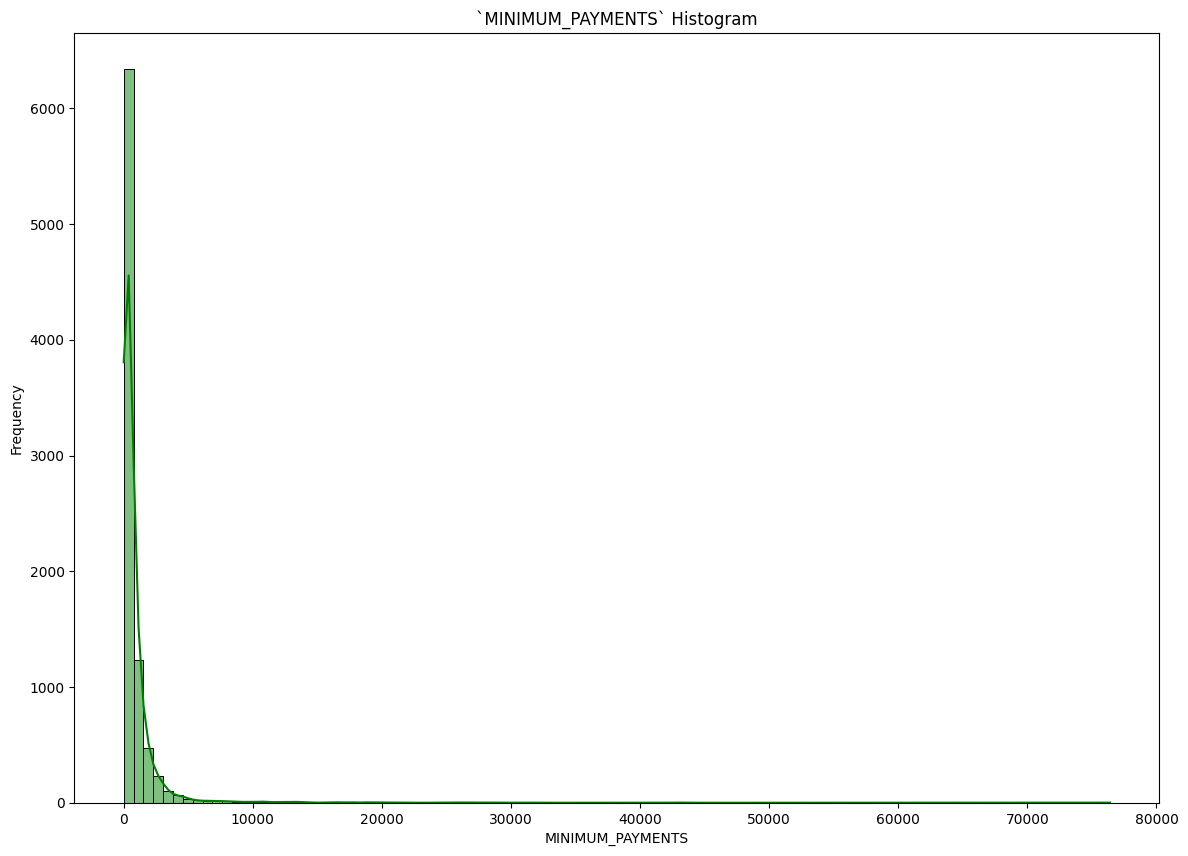

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.histplot(df['MINIMUM_PAYMENTS'], bins=100, alpha=0.5, color='g', kde=True)
plt.title('`MINIMUM_PAYMENTS` Histogram')
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('Frequency')
plt.show()

The data in MINIMUM_PAYMENTS is right-skewed and there are missing values, we can consider filling the missing values with the minimum non-zero value of the column to  avoid inflating the central tendency,

### 2.5.1 Imputing Missing Value


In [ ]:
min_value = df['MINIMUM_PAYMENTS'].min()
df['MINIMUM_PAYMENTS'].fillna(min_value, inplace=True)

print("No of missing values in `MINIMUM_PAYMENTS` : ", df["MINIMUM_PAYMENTS"].isnull().sum())

No of missing values in `MINIMUM_PAYMENTS` :  0


## 2.6. CREDIT_LIMIT

In [ ]:
print("No of missing values in `CREDIT_LIMIT` : ", df["CREDIT_LIMIT"].isnull().sum())


No of missing values in `CREDIT_LIMIT` :  1


- There is only 1 value in the `CREDIT_LIMIT` out 0f 8950 observation. We can simply remove this observation from the data.

In [ ]:
df = df.dropna(subset=['CREDIT_LIMIT'], axis=0)

print("No of missing values in `CREDIT_LIMIT` : ", df["CREDIT_LIMIT"].isnull().sum())
print(f"Shape of Data :{df.shape}")

No of missing values in `CREDIT_LIMIT` :  0
Shape of Data :(8949, 17)


# 2.7. Correlation

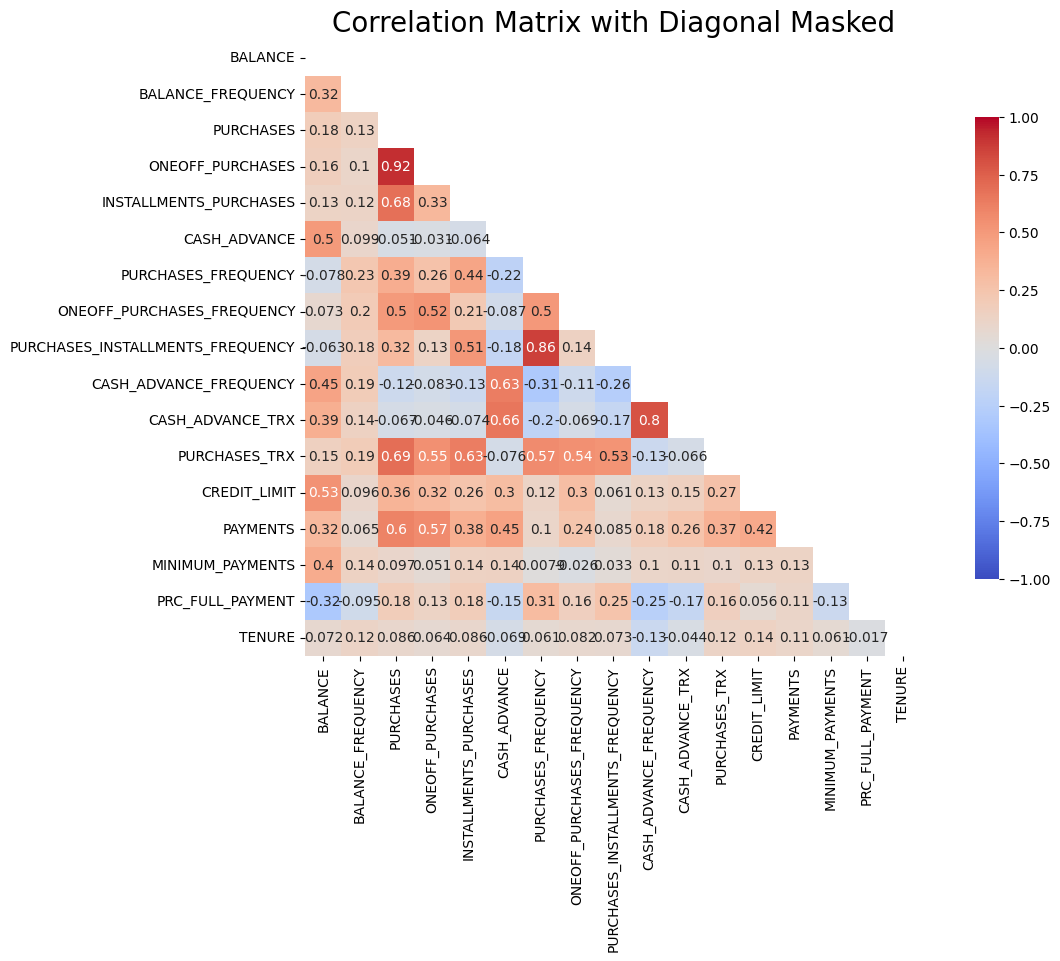

In [ ]:
plt.figure(figsize=(14, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=mask, square=True, cbar_kws={"shrink": 0.75}, vmin=-1, vmax=1)


plt.title("Correlation Matrix with Diagonal Masked", fontsize=20)
plt.show()

### Strong Positive Correlations:
- **Oneoff_Purchases with Purchases (0.92)**: Higher one-off purchases strongly relate to higher total purchases.
- **Cash_Advance with Cash_Advance_TRX (0.80)**: More cash advance transactions mean a higher cash advance amount.

### Notable Negative Correlations:
- **PRC_Full_Payment with Balance (-0.32)**: Higher likelihood of full payments associates with lower balances.
- **PRC_Full_Payment with Cash_Advance (-0.30)**: More full payments correlate with less reliance on cash advances.

### Moderate Correlations:
- **Balance with Cash_Advance (0.50)**: Higher balances tend to coincide with higher cash advances.
- **Credit_Limit with Cash_Advance (0.36)**: Larger credit limits slightly relate to higher cash advance amounts.

### Low Correlations:
- **Most other pairs** show weak or no significant relationships, indicating limited interaction among those variables.


df

# 3. Analysis

# 3.1 PCA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

pca_columns = [f'PCA{i+1}' for i in range((len(df.columns)))]
pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)
pca_df.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.684484 -1.070217 -0.469997  0.686725 -0.056053 -0.080315 -0.817358   
1 -1.132568  2.510222 -0.603830 -0.104391 -0.701246  1.074137  0.391847   
2  0.968926 -0.383446 -0.086175  1.252350  2.160177  0.394581  1.522617   
3 -0.897248 -0.017764 -1.526942  1.031341 -0.189525  0.198574  0.210129   
4 -1.600519 -0.681375 -0.340010  1.024973  0.436712 -0.078247 -0.691393   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.006871  0.119547  0.078525 -0.236376  0.051641  0.082369  0.188378   
1  0.196580  0.667960  0.778227 -0.870268  0.610110  0.033135  0.731434   
2 -0.258764 -0.859574  0.001632 -0.762395 -0.683279 -0.697248 -0.042265   
3 -0.761288 -0.014698 -0.393904  0.748709 -0.101937  0.112596  0.413100   
4  0.263664  0.575308  0.122481 -0.455140  0.110116  0.036774  0.041101   

      PCA15     PCA16     PCA17  
0 -0.149238  0.048147  0.000160  
1  0.533417 -0.082876 -0.000003  
2 -0.221157  0.511270 -0.000023  
3  0.084170 -0.014561  0.000013  
4 -0.291180 -0.070558  0.000081

In [ ]:
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_


pca_summary = pd.DataFrame({
    'Eigenvalues': eigenvalues,
    'Explained Variance': explained_var,
    'Cumulative Explained Variance': cumulative_var,
})

pca_summary.index = pd.RangeIndex(start=1, stop=len(explained_var) + 1, name='Principal Component')

pca_summary

Eigenvalues  Explained Variance  \
Principal Component                                    
1                       4.641399        2.729930e-01   
2                       3.454852        2.032039e-01   
3                       1.500345        8.824573e-02   
4                       1.271731        7.479937e-02   
5                       1.054981        6.205077e-02   
6                       0.974672        5.732724e-02   
7                       0.830031        4.881988e-02   
8                       0.735091        4.323579e-02   
9                       0.642875        3.781196e-02   
10                      0.523674        3.080091e-02   
11                      0.403382        2.372569e-02   
12                      0.301515        1.773422e-02   
13                      0.242932        1.428852e-02   
14                      0.206852        1.216639e-02   
15                      0.172152        1.012545e-02   
16                      0.045405        2.670581e-03   
17                      0.000012        6.852429e-07   

                     Cumulative Explained Variance  
Principal Component                                 
1                                         0.272993  
2                                         0.476197  
3                                         0.564443  
4                                         0.639242  
5                                         0.701293  
6                                         0.758620  
7                                         0.807440  
8                                         0.850676  
9                                         0.888488  
10                                        0.919288  
11                                        0.943014  
12                                        0.960748  
13                                        0.975037  
14                                        0.987203  
15                                        0.997329  
16                                        0.999999  
17                                        1.000000

In [ ]:
def get_img_path(img_name):
    file_path = os.path.join("..", "imgs", img_name)
    return file_path

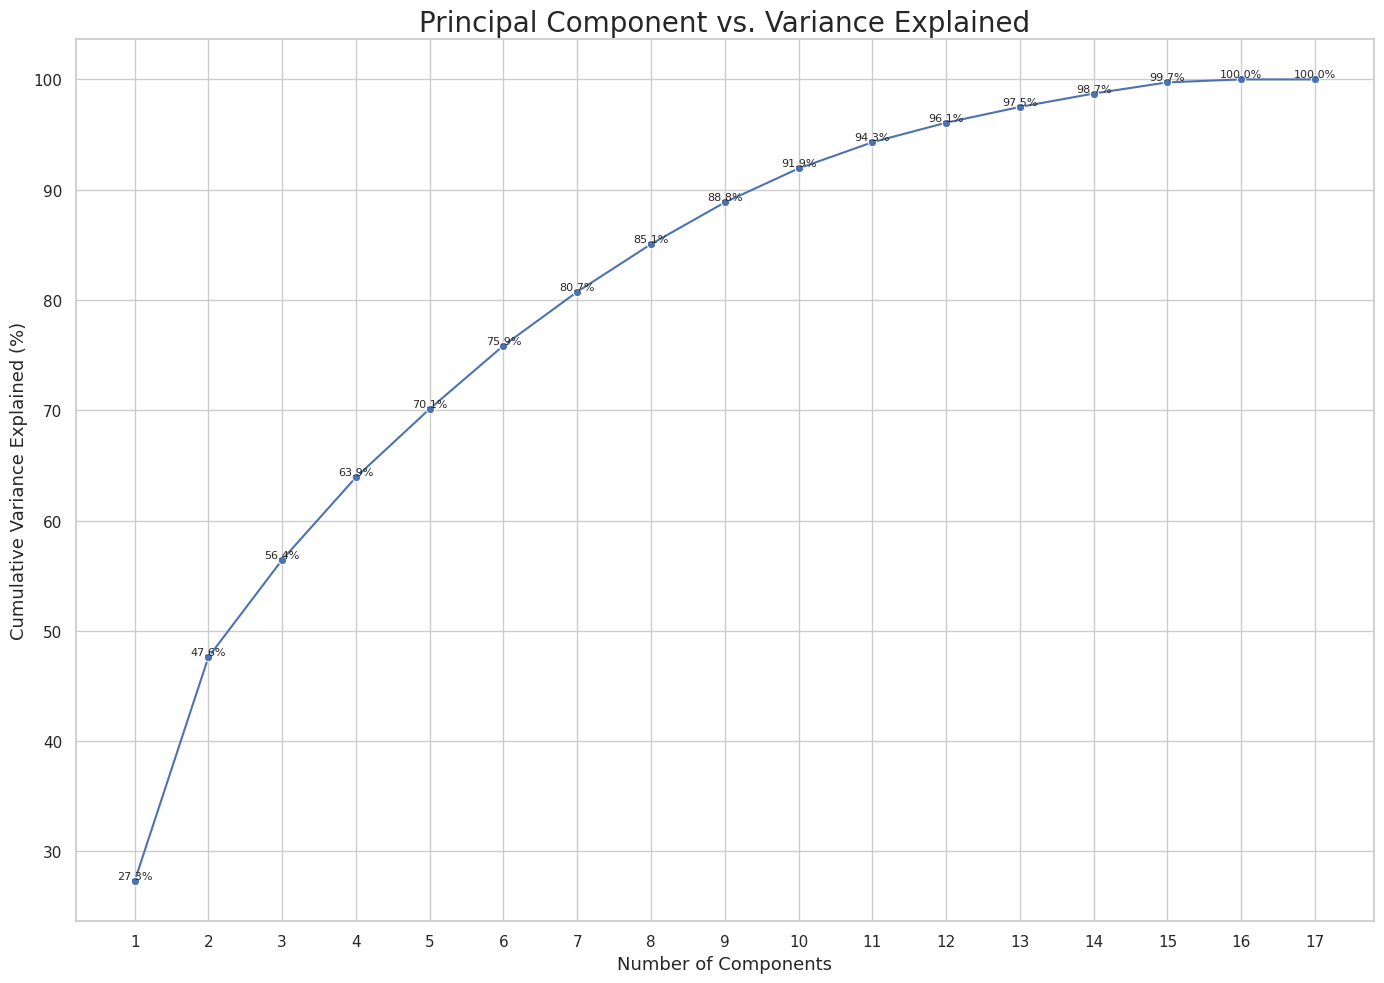

Image saved at: /content/pca_variance_explained.png


In [ ]:
# Configure the plot style
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")  # A clean, minimal style is suitable for Colab visuals

# Plot cumulative explained variance
sns.lineplot(x=np.arange(1, len(pca.explained_variance_ratio_) + 1),
             y=np.cumsum(pca.explained_variance_ratio_) * 100, marker='o', color="b")

# Annotate each point with the cumulative variance percentage
for i, percentage in enumerate(np.cumsum(pca.explained_variance_ratio_) * 100):
    plt.text(i + 1, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

# Labels and title
plt.xlabel('Number of Components', fontsize=13)
plt.ylabel('Cumulative Variance Explained (%)', fontsize=13)
plt.title('Principal Component vs. Variance Explained', fontsize=20)
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))

# Save the plot as a high-resolution image in Colab
plt.tight_layout()
img_path = "/content/pca_variance_explained.png"
plt.savefig(img_path, dpi=700)
plt.show()

# Display the saved image path for download if needed
print(f"Image saved at: {img_path}")


# 3.2. K-Means Clustering

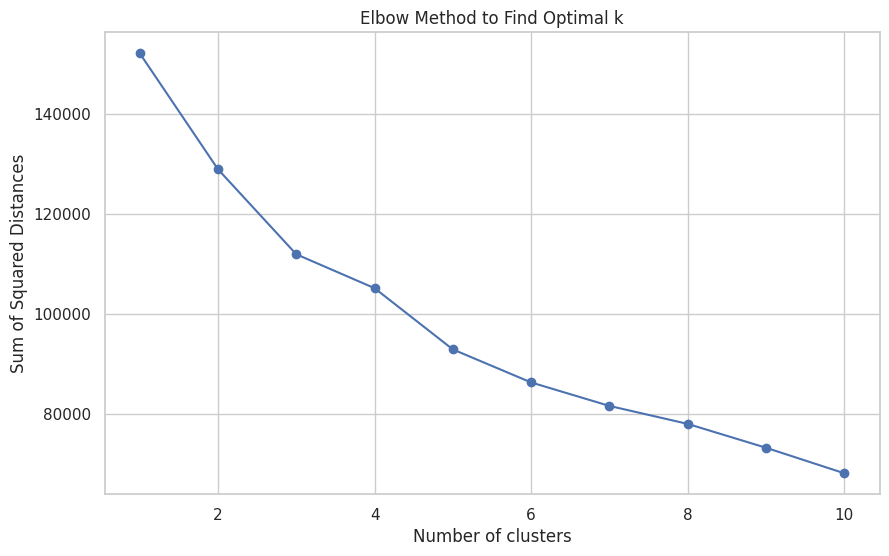

In [ ]:
# List to store the sum of squared distances
sse = []

# Test clustering with 1 to 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method to Find Optimal k")
plt.show()


we can take k = 4 or 5

## 3.2.1. Silhouette score for choosing between k= 4 and. k = 5

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Define models for 4 and 5 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_5 = KMeans(n_clusters=5, random_state=42)

# Fit the models and predict clusters
labels_4 = kmeans_4.fit_predict(df_scaled)
labels_5 = kmeans_5.fit_predict(df_scaled)

# Calculate silhouette scores
silhouette_score_4 = silhouette_score(df_scaled, labels_4)
silhouette_score_5 = silhouette_score(df_scaled, labels_5)

print(f"Silhouette Score for 4 Clusters: {silhouette_score_4}")
print(f"Silhouette Score for 5 Clusters: {silhouette_score_5}")


Silhouette Score for 4 Clusters: 0.2241573918853967
Silhouette Score for 5 Clusters: 0.20996715451096024


- 4 Clusters: 0.22415
- 5 Clusters: 0.2099

The silhouette score is slightly higher for 4 clusters than for 5 clusters, indicating that the 4-cluster solution provides slightly better-defined clusters in terms of separation and cohesion.

# 3.2.2.  4 clusters

In [ ]:
kmeans= KMeans(4, random_state = 0)
kmeans.fit(df_scaled)
labels=kmeans.labels_

inertia = kmeans.inertia_
n_iter = kmeans.n_iter_
n_features_in = kmeans.n_features_in_

print(f"\nSum of Squared Distances to Closest Cluster Center (Inertia): {inertia:.1f}")
print("\nNumber of Iterations Run: ", n_iter)
print("\nNumber of Features Seen During Fit:", n_features_in)


Sum of Squared Distances to Closest Cluster Center (Inertia): 99048.3

Number of Iterations Run:  17

Number of Features Seen During Fit: 17


In [ ]:
clusters_df = df.copy()
clusters_df['cluster_label'] = labels
clusters_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742        627.284787          0.000000   
C10004         7500.0     0.000000          0.019163          0.000000   
C10005         1200.0   678.334763        244.791237          0.000000   

         TENURE  cluster_label  
CUST_ID                         
C10001       12              1  
C10002       12              2  
C10003       12              3  
C10004       12              1  
C10005       12              1

Here, We are visualizing clusters created by the KMeans algorithm on data that has been reduced to two principal components (PCA1 and PCA2). Each point in the scatter plot represents an observation from the dataset, and each cluster is shown in a distinct color. This visualization helps us:

By plotting clusters along two principal components, we can visually assess how well-separated the clusters are in reduced dimensional space.

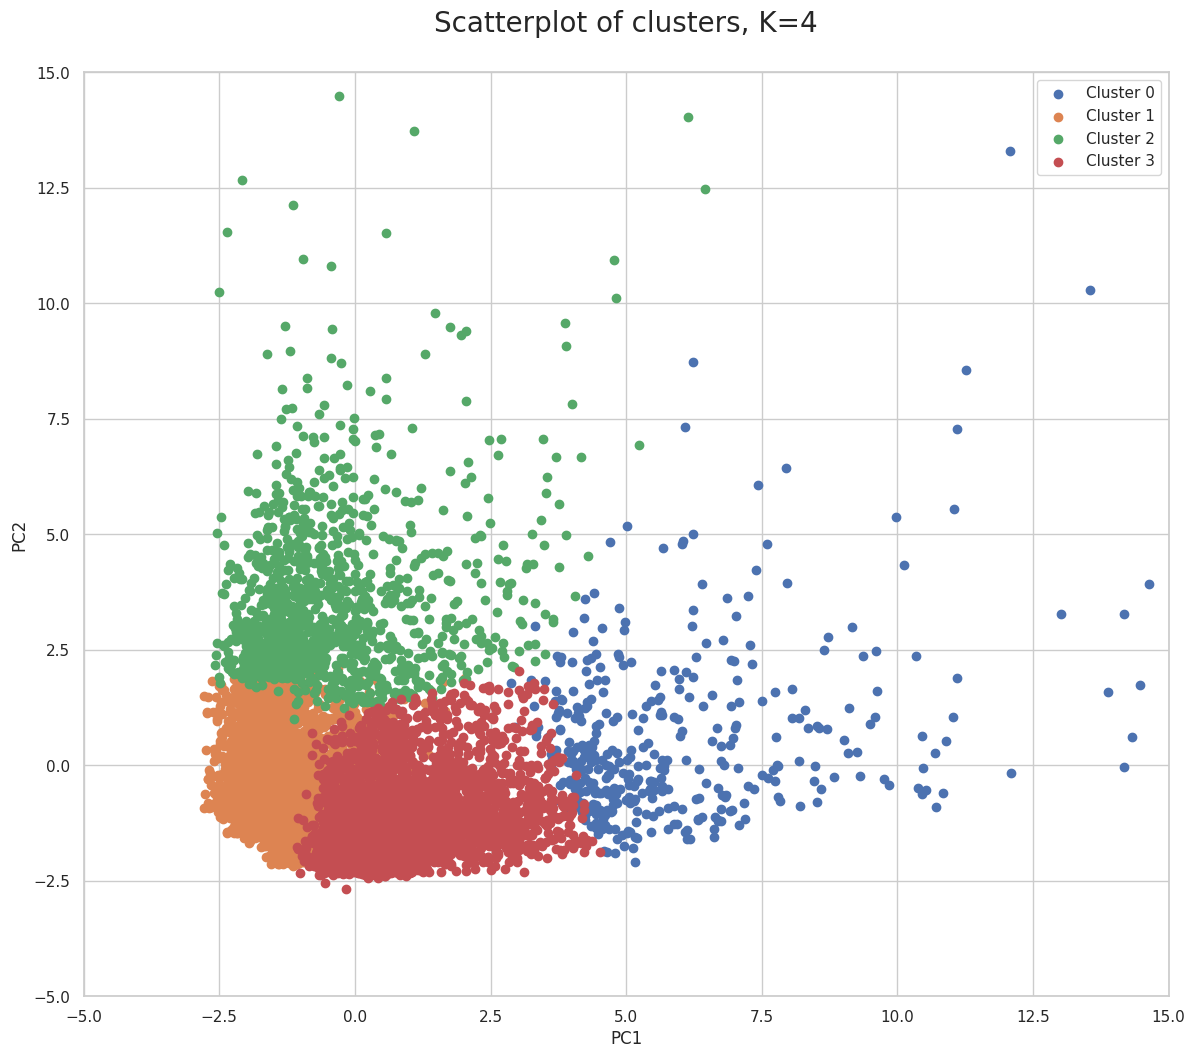

In [ ]:
plt.figure(figsize=(14, 12))

clusters_df = pca_df[['PCA1', 'PCA2']]
clusters_df['cluster_label'] = labels
for cluster_name, cluster_data in clusters_df.groupby('cluster_label'):
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_name}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of clusters, K=4\n', fontsize = 20)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.legend()
plt.show()




- **Cluster Separation:** The four clusters are generally well-separated, with Cluster 0 (blue) distinctly isolated on the left, while Clusters 1 (red) and 2 (green) overlap slightly, suggesting some similarity.

- **Density and Spread:** Cluster 3 (orange) is compact, indicating tightly grouped data points, while Clusters 1 and 2 cover more area, showing greater spread.

- **Principal Components:** The plot confirms that PC1 and PC2 capture significant data variation, effectively differentiating the clusters.

# 3.2.3. Biplot

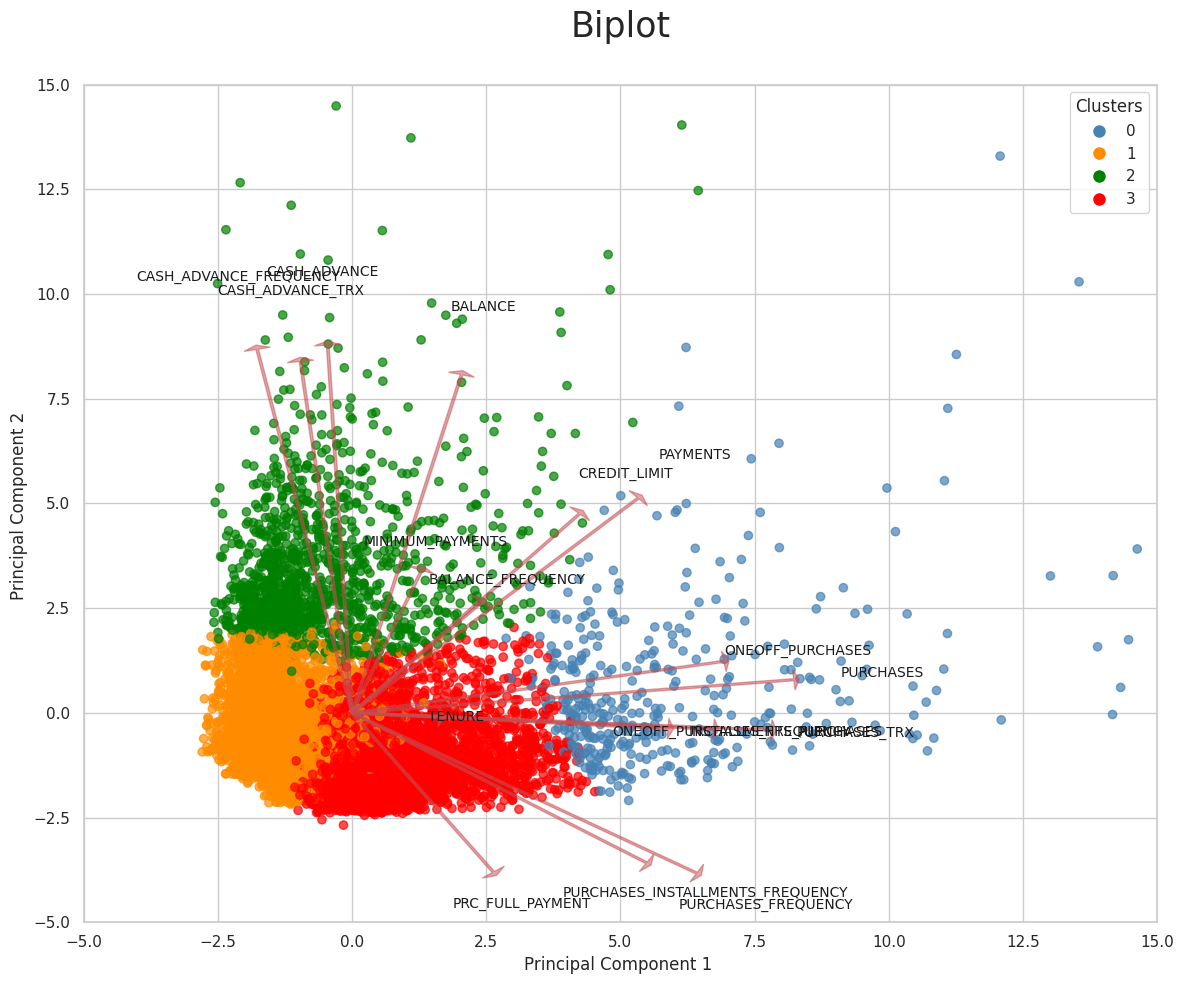

In [ ]:
pca_result = pca.fit_transform(df_scaled)

def biplot(score, coeff, labels=None, scaling_factor=1.0):
    plt.figure(figsize=(12, 10))
    coeff = np.transpose(coeff)

    custom_cmap = {0: 'steelblue', 1: 'darkorange', 2: 'green', 3: 'red'}
    cluster_colors = clusters_df['cluster_label'].map(custom_cmap)
    plt.scatter(score[:, 0], score[:, 1], alpha=0.7, c=cluster_colors)

    for i in range(coeff.shape[1]):
        plt.arrow(0, 0, coeff[0, i] * scaling_factor, coeff[1, i] * scaling_factor,
                  color='r', alpha=0.5, head_width=0.5, head_length=0.1,width = 0.05)
        if labels is not None:
            plt.text(coeff[0, i] * scaling_factor * 1.2, coeff[1, i] * scaling_factor * 1.2,
                     labels[i], color='k', ha='center', va='center',fontsize = 10)

    plt.xlabel(f'Principal Component 1 ')
    plt.ylabel(f'Principal Component 2 ')
    plt.title('Biplot\n', fontsize = 25)

    legend_handles = []
    for label, color in custom_cmap.items():
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{label}', markerfacecolor=color, markersize=10))
    plt.legend(handles=legend_handles, title='Clusters', loc='best')

    plt.xlim(-5, 15)
    plt.ylim(-5, 15)

    img_path = get_img_path("biplot.png")
    plt.tight_layout()

    plt.show()

biplot(pca_result, np.transpose(pca.components_), labels=df.columns, scaling_factor=20.0)

- **Feature Vectors (Arrows):**
CASH_ADVANCE, CASH_ADVANCE_TRX, FREQUENCY: Strongly aligned with PC2 and Cluster 2 (green), indicating high cash advance usage and frequency.

- **TENURE, PRC_FULL_PAYMENT:** Point towards Cluster 3 (red), suggesting this group includes customers with long tenure and consistent full payments.

- **ONEOFF_PURCHASES, PURCHASES, PURCHASES_FREQUENCY:** Aligned with PC1 and Cluster 0 (blue), indicating frequent purchase behaviors.
BALANCE, CREDIT_LIMIT, MINIMUM_PAYMENTS: Associated with Cluster 2 (green), indicating higher balances and credit limits.

- **Cluster Characteristics:**

    ***Blue Cluster (Cluster 0):*** Represents frequent purchasers with high transaction activity.

    ***Green Cluster (Cluster 2):*** Defined by high balances, credit limits, and cash advances.

    ***Red Cluster (Cluster 3):*** Represents loyal, long-tenure customers with consistent payments.

    ***Orange Cluster (Cluster 1):*** Likely lower credit activity or engagement.


# 3.3. K-Means on PCA

From section 3.1, we have observed that the first 10 principal components explain approximately 92% of the variance.

In [ ]:
pc10_df = pca_df.iloc[:, :10]
pc10_df

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -1.684484 -1.070217 -0.469997  0.686725 -0.056053 -0.080315 -0.817358   
1    -1.132568  2.510222 -0.603830 -0.104391 -0.701246  1.074137  0.391847   
2     0.968926 -0.383446 -0.086175  1.252350  2.160177  0.394581  1.522617   
3    -0.897248 -0.017764 -1.526942  1.031341 -0.189525  0.198574  0.210129   
4    -1.600519 -0.681375 -0.340010  1.024973  0.436712 -0.078247 -0.691393   
...        ...       ...       ...       ...       ...       ...       ...   
8944 -0.363616 -2.011357  0.972365 -2.751539 -0.025599 -2.675851  1.584835   
8945 -0.590114 -1.696259  1.188659 -2.046311  0.239421 -3.267281  1.058988   
8946 -0.929900 -1.806109  0.456199 -2.306577 -0.128611 -2.984803  1.422893   
8947 -2.338056 -0.650937 -0.980592 -1.844275  0.171597 -3.185369  1.000218   
8948 -0.558378 -0.400222 -1.036358 -1.936868  1.574308 -3.619153  1.420138   

          PCA8      PCA9     PCA10  
0    -0.006871  0.119547  0.078525  
1     0.196580  0.667960  0.778227  
2    -0.258764 -0.859574  0.001632  
3    -0.761288 -0.014698 -0.393904  
4     0.263664  0.575308  0.122481  
...        ...       ...       ...  
8944  0.300969  1.338295  0.843490  
8945 -0.700933  0.967791  1.243780  
8946 -0.278665  0.785603  0.828470  
8947  0.259497  1.172735 -0.270258  
8948 -0.425375 -0.846418 -0.348313  

[8949 rows x 10 columns]

Here, we are attempting to determine the optimal number of clusters. Instead of fitting K-means on the entire dataset, we are applying it to the first 10 principal components, as they capture a significant amount of variance, which helps reduce computational cost. We then use the elbow method to identify the optimal number of clusters.

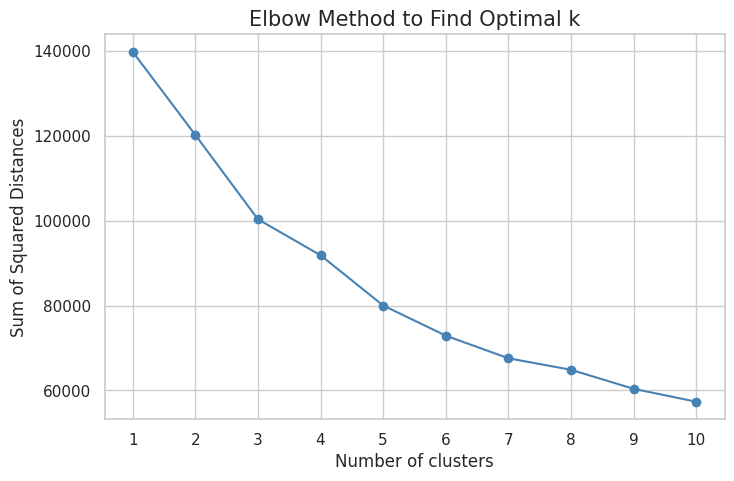

In [ ]:
n_clusters = 10
cost = []

# Loop through the range of clusters and compute the cost (inertia)
for i in range(1, n_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pc10_df)
    cost.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_clusters + 1), cost, marker='o', linestyle='-', color='steelblue')
plt.title('Elbow Method to Find Optimal k', fontsize=15)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(range(1, n_clusters + 1))  # Setting x-ticks to display each cluster number
plt.grid(True)
plt.show()


optimal number of cluster is 4

In [ ]:
kmeans= KMeans(4, random_state = 0)
kmeans.fit(df_scaled)
labels=kmeans.labels_

inertia = kmeans.inertia_
n_iter = kmeans.n_iter_
n_features_in = kmeans.n_features_in_

print(f"\nSum of Squared Distances to Closest Cluster Center (Inertia): {inertia:.1f}")
print("\nNumber of Iterations Run: ", n_iter)
print("\nNumber of Features Seen During Fit:", n_features_in)


Sum of Squared Distances to Closest Cluster Center (Inertia): 99048.3

Number of Iterations Run:  17

Number of Features Seen During Fit: 17


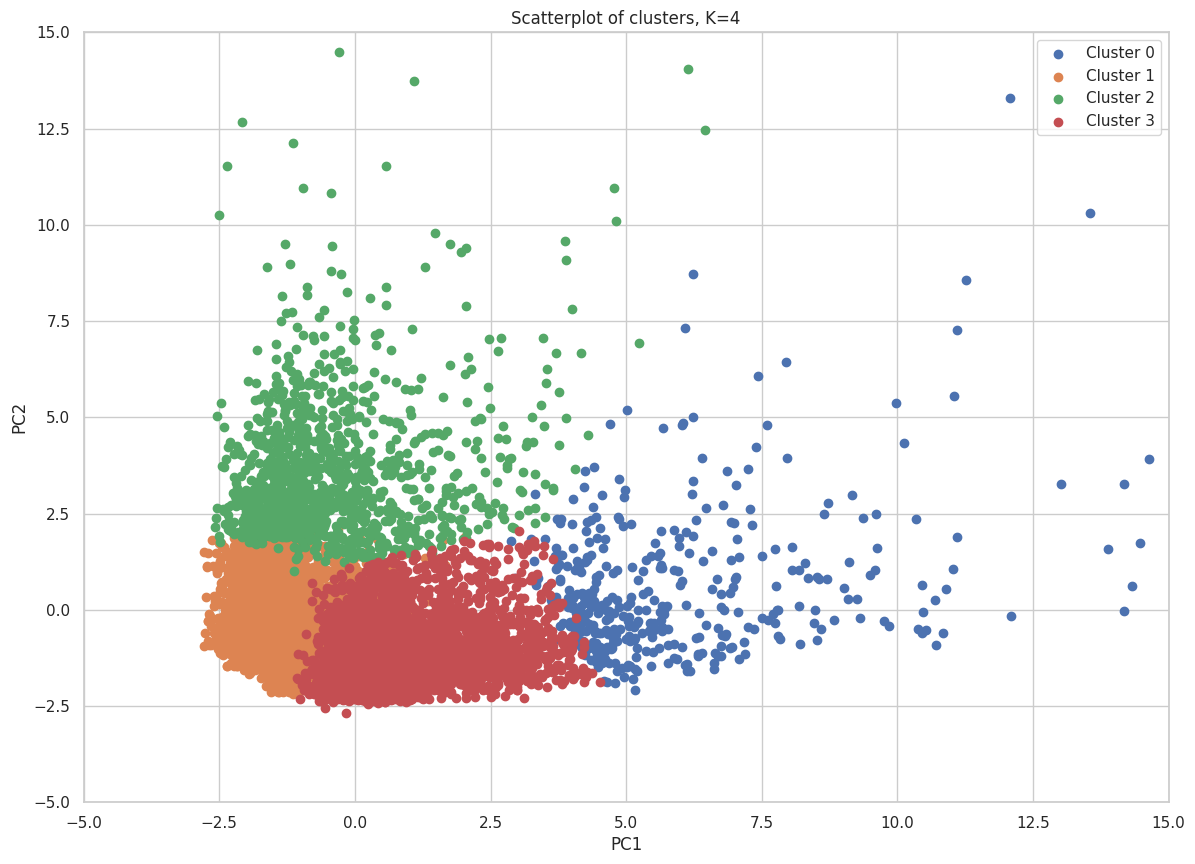

In [ ]:
plt.figure(figsize=(14, 10))

clusters_df = pca_df[['PCA1', 'PCA2']]
clusters_df['cluster_label'] = labels
for cluster_name, cluster_data in clusters_df.groupby('cluster_label'):
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_name}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of clusters, K=4')
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.legend()
plt.show()

# 3.3.1. Biplot

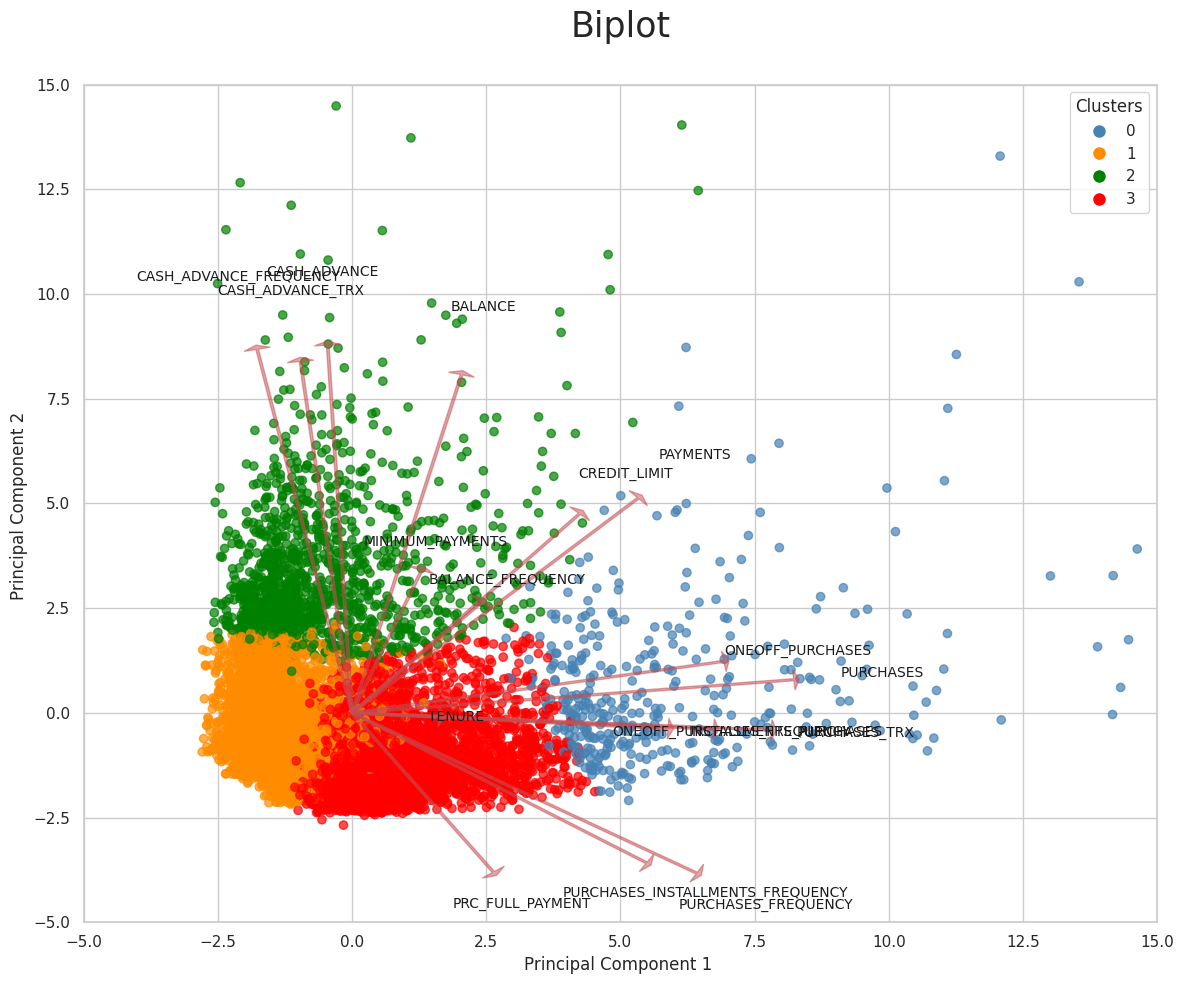

In [ ]:
pca_result = pca.fit_transform(df_scaled)

def biplot(score, coeff, labels=None, scaling_factor=1.0):
    plt.figure(figsize=(12, 10))
    coeff = np.transpose(coeff)

    custom_cmap = {0: 'steelblue', 1: 'darkorange', 2: 'green', 3: 'red'}
    cluster_colors = clusters_df['cluster_label'].map(custom_cmap)
    plt.scatter(score[:, 0], score[:, 1], alpha=0.7, c=cluster_colors)

    for i in range(coeff.shape[1]):
        plt.arrow(0, 0, coeff[0, i] * scaling_factor, coeff[1, i] * scaling_factor,
                  color='r', alpha=0.5, head_width=0.5, head_length=0.1,width = 0.05)
        if labels is not None:
            plt.text(coeff[0, i] * scaling_factor * 1.2, coeff[1, i] * scaling_factor * 1.2,
                     labels[i], color='k', ha='center', va='center',fontsize = 10)

    plt.xlabel(f'Principal Component 1 ')
    plt.ylabel(f'Principal Component 2 ')
    plt.title('Biplot\n', fontsize = 25)

    legend_handles = []
    for label, color in custom_cmap.items():
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{label}', markerfacecolor=color, markersize=10))
    plt.legend(handles=legend_handles, title='Clusters', loc='best')

    plt.xlim(-5, 15)
    plt.ylim(-5, 15)

    img_path = get_img_path("biplot.png")
    plt.tight_layout()

    plt.show()

biplot(pca_result, np.transpose(pca.components_), labels=df.columns, scaling_factor=20.0)

we can see clearly that both the methods from section 3.2 and 3.3 gives us the same result

# 3.4. Hierachial Clustering

## 3.4.1. **Complete Linakge**


complete linkage does not gives good result with standard scaler so we use minmax scaler

Cluster Counts Table:
   Cluster Label  No of Observation
0              0               2924
1              1                 31
2              2               5993
3              3                  1


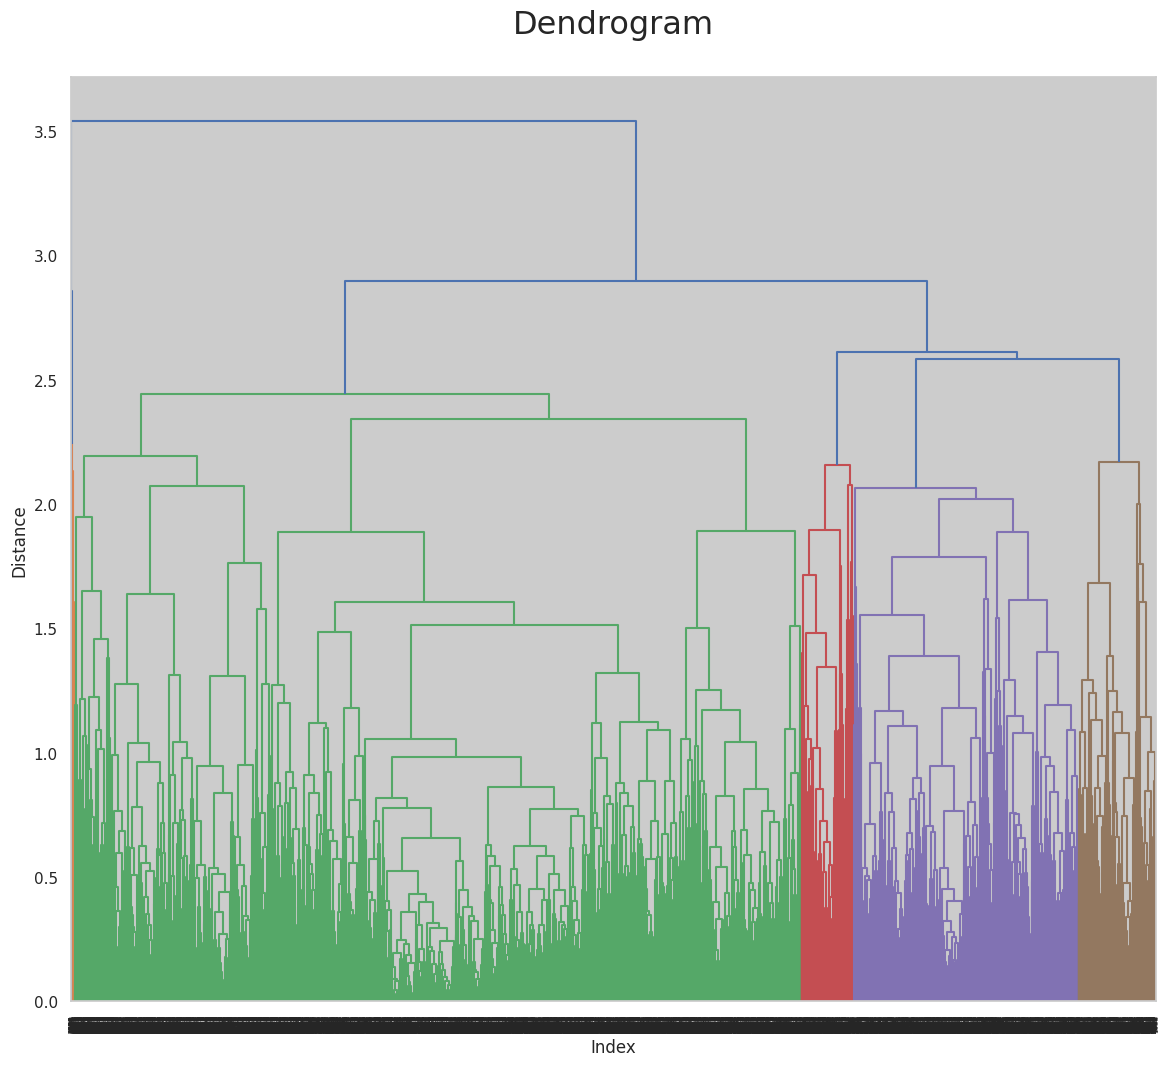

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Scaling data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Performing Agglomerative Clustering with complete linkage
model = AgglomerativeClustering(n_clusters=4, linkage='complete')
clusters = model.fit_predict(df_scaled)

# Adding cluster labels to the DataFrame
clusters_df_agg = df_scaled.copy()
clusters_df_agg['cluster_label'] = clusters

# Counting observations per cluster
cluster_counts = clusters_df_agg['cluster_label'].value_counts().reset_index()
cluster_counts.columns = ['Cluster Label', 'No of Observation']
cluster_counts = cluster_counts.sort_values('Cluster Label').reset_index(drop=True)

# Display cluster counts
print("Cluster Counts Table:")
print(cluster_counts)

# Generate dendrogram for complete linkage
linkage_matrix = linkage(df_scaled, method='complete')

plt.figure(figsize=(14, 12))
dendrogram(linkage_matrix)
plt.title('Dendrogram\n', fontsize = 23)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming `clusters_df_agg` contains the data with 'cluster_label' assigned from the dendrogram
score = silhouette_score(df_scaled, clusters_df_agg['cluster_label'])
print("Silhouette Score for Complete Linkage Clustering:", score)


Silhouette Score for Complete Linkage Clustering: 0.3337342672461978


- **Cluster Size Imbalance:** Most observations fall into clusters 2 and 0 (5993 and 2924 points, respectively), indicating two dominant clusters.

- **Potential Outliers:** Clusters 1 and 3 are tiny (31 and 1 observation), suggesting they may represent outliers.

- **Cluster Density:** Complete linkage produced compact clusters, with clusters 0 and 2 likely representing denser regions of the data.

**Conclusion:** The uneven cluster sizes and low Silhouette Score imply that complete linkage may not be the best fit if balanced clusters are desired.








# 3.5 GMM

### 3.5.1. n_components = 4

In [ ]:
from sklearn.mixture import GaussianMixture

# Define the number of clusters for GMM
n_components = 4 # You can adjust this based on your analysis

# Fit the GMM model
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm_clusters = gmm.fit_predict(df_scaled)

# Adding GMM cluster labels to the DataFrame
clusters_df_gmm = df_scaled.copy()
clusters_df_gmm['gmm_cluster_label'] = gmm_clusters

# Counting observations per GMM cluster
gmm_cluster_counts = clusters_df_gmm['gmm_cluster_label'].value_counts().reset_index()
gmm_cluster_counts.columns = ['GMM Cluster Label', 'No of Observation']
gmm_cluster_counts = gmm_cluster_counts.sort_values('GMM Cluster Label').reset_index(drop=True)

# Display GMM cluster counts
print("GMM Cluster Counts Table:")
print(gmm_cluster_counts)

from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the GMM clustering
silhouette_avg = silhouette_score(df_scaled, gmm_clusters)

print(f"Silhouette Score for GMM clustering: {silhouette_avg}")


GMM Cluster Counts Table:
   GMM Cluster Label  No of Observation
0                  0               2849
1                  1                463
2                  2               2260
3                  3               3377
Silhouette Score for GMM clustering: 0.14869773487737398


The Silhouette Score for GMM clustering is 0.1487, which is close to 0. This low score indicates poor performance of GMM, suggesting that the clusters are not well-defined or distinct.

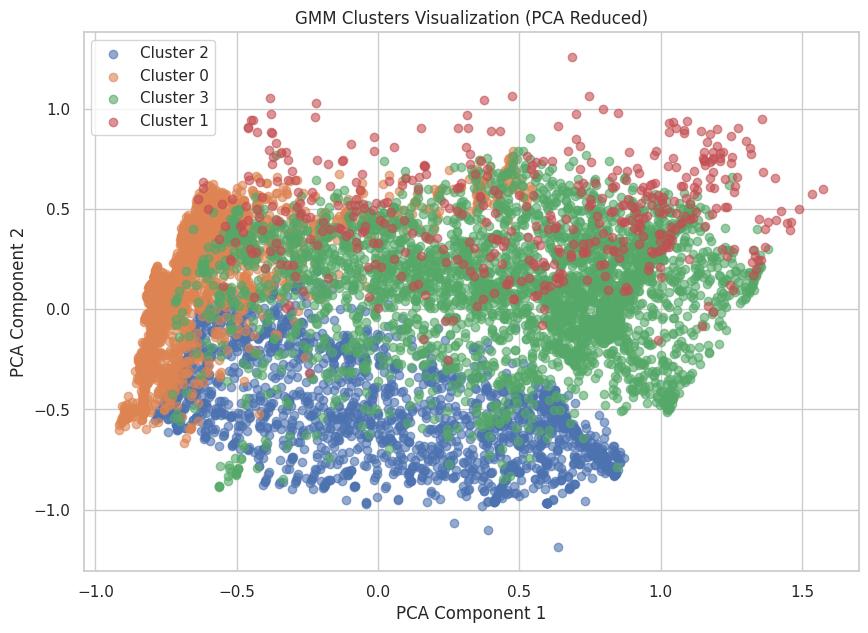

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results with the GMM labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['gmm_cluster_label'] = gmm_clusters

# Plotting the clusters
plt.figure(figsize=(10, 7))
for cluster in df_pca['gmm_cluster_label'].unique():
    cluster_data = df_pca[df_pca['gmm_cluster_label'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("GMM Clusters Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


**Significant Overlap:** Clusters, especially 0, 2, and 3, have considerable overlap, indicating poorly defined boundaries.

**Spread of Clusters:** Cluster 3 spans widely, suggesting it captures diverse points, further blurring distinct cluster separations.

**Irregular Shapes:** Clusters do not fully conform to Gaussian (elliptical) shapes, misaligning with GMM’s assumptions.

**Poor Cluster Quality:** The overlap and lack of distinct boundaries explain the low silhouette score, indicating GMM's limitations on this dataset.








### **3.5.2.Hyperparameter Optimization of Gaussian Mixture Model (GMM) Using Optuna for Maximizing Silhouette Score**


In [ ]:
import optuna
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    # Suggest parameters
    n_components = trial.suggest_int('n_components', 2, 10)
    covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
    n_init = trial.suggest_categorical('n_init', [1, 5, 10])

    # Initialize and fit GMM with suggested parameters
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, n_init=n_init, random_state=42)
    labels = gmm.fit_predict(df_scaled)

    # Calculate silhouette score
    score = silhouette_score(df_scaled, labels)

    return score

# Create a study object and optimize it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can increase n_trials for more extensive search

# Retrieve the best parameters and score
best_params = study.best_params
best_score = study.best_value
print("Best parameters found:", best_params)
print("Best silhouette score achieved:", best_score)

# Fit the final GMM model with the best parameters
best_gmm = GaussianMixture(
    n_components=best_params['n_components'],
    covariance_type=best_params['covariance_type'],
    n_init=best_params['n_init'],
    random_state=42
)
best_gmm.fit(df_scaled)


[I 2024-11-11 07:37:17,588] A new study created in memory with name: no-name-74df003a-a398-44d7-b44c-eac533deb786
[I 2024-11-11 07:38:43,150] Trial 0 finished with value: 0.0635067304413128 and parameters: {'n_components': 9, 'covariance_type': 'full', 'n_init': 10}. Best is trial 0 with value: 0.0635067304413128.
[I 2024-11-11 07:38:52,249] Trial 1 finished with value: 0.05110652550711012 and parameters: {'n_components': 9, 'covariance_type': 'diag', 'n_init': 10}. Best is trial 0 with value: 0.0635067304413128.
[I 2024-11-11 07:38:57,490] Trial 2 finished with value: 0.18585551592829894 and parameters: {'n_components': 10, 'covariance_type': 'spherical', 'n_init': 10}. Best is trial 2 with value: 0.18585551592829894.
[I 2024-11-11 07:38:59,716] Trial 3 finished with value: 0.1381982456876413 and parameters: {'n_components': 4, 'covariance_type': 'diag', 'n_init': 5}. Best is trial 2 with value: 0.18585551592829894.
[I 2024-11-11 07:39:02,673] Trial 4 finished with value: 0.2668672987

Best parameters found: {'n_components': 2, 'covariance_type': 'tied', 'n_init': 1}
Best silhouette score achieved: 0.3361245461192623


GaussianMixture(covariance_type='tied', n_components=2, random_state=42)

### **3.5.3. GMM with best Parameters**

Silhouette Score for optimized GMM clustering: 0.3361245461192623


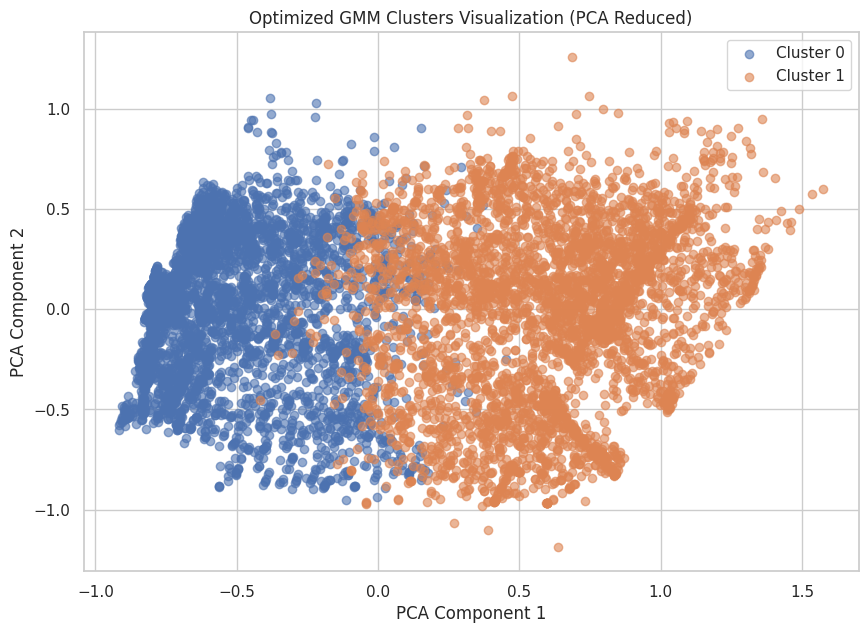

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Gaussian Mixture Model with the best parameters
best_gmm = GaussianMixture(covariance_type='tied', n_components=2, random_state=42)
gmm_clusters = best_gmm.fit_predict(df_scaled)

# Calculate silhouette score with the best parameters
silhouette_avg = silhouette_score(df_scaled, gmm_clusters)
print(f"Silhouette Score for optimized GMM clustering: {silhouette_avg}")

# Optional: Add cluster labels to the DataFrame for further analysis
clusters_df = df_scaled.copy()
clusters_df['gmm_cluster_label'] = gmm_clusters

# Visualize the clusters using PCA for 2D projection
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert PCA result to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['gmm_cluster_label'] = gmm_clusters

# Plot the clusters
plt.figure(figsize=(10, 7))
for cluster in df_pca['gmm_cluster_label'].unique():
    cluster_data = df_pca[df_pca['gmm_cluster_label'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("Optimized GMM Clusters Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


Clusters are better separated, though some overlap remains, particularly in the center.

The optimized silhouette score of 0.336 indicates moderate improvement in clustering quality.

lets check assumptions of GMM it might possible that assumptions not satisfied leads to poor performance









## **3.5.4 Checking Assumption for GMM**

### 1. Gaussian Distribution of Each Cluster

In [ ]:
from scipy.stats import shapiro
import pandas as pd

# Perform Shapiro-Wilk test for each feature in each cluster
gmm_clusters = best_gmm.fit_predict(df_scaled)  # Assuming best_gmm and df_scaled are defined
clusters_df = df_scaled.copy()
clusters_df['cluster'] = gmm_clusters

# Store Shapiro-Wilk test results
results = []

for cluster in clusters_df['cluster'].unique():
    cluster_data = clusters_df[clusters_df['cluster'] == cluster].drop(columns='cluster')
    normal_features = []
    print(f"\nCluster {cluster} - Normally Distributed Features:")
    for col in cluster_data.columns:
        stat, p_value = shapiro(cluster_data[col])
        if p_value >= 0.05:
            normal_features.append((col, p_value))

    # Check if there are normally distributed features
    if normal_features:
        for feature, p_value in normal_features:
            print(f"Feature '{feature}' - p-value: {p_value} (Likely Normally Distributed)")
    else:
        print("No features follow a normal distribution")



Cluster 0 - Normally Distributed Features:
Feature 'Cluster' - p-value: 1.0 (Likely Normally Distributed)
Feature 'Cluster_Label' - p-value: 1.0 (Likely Normally Distributed)

Cluster 1 - Normally Distributed Features:
No features follow a normal distribution


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

### 2. Independence of Features within Each Cluster

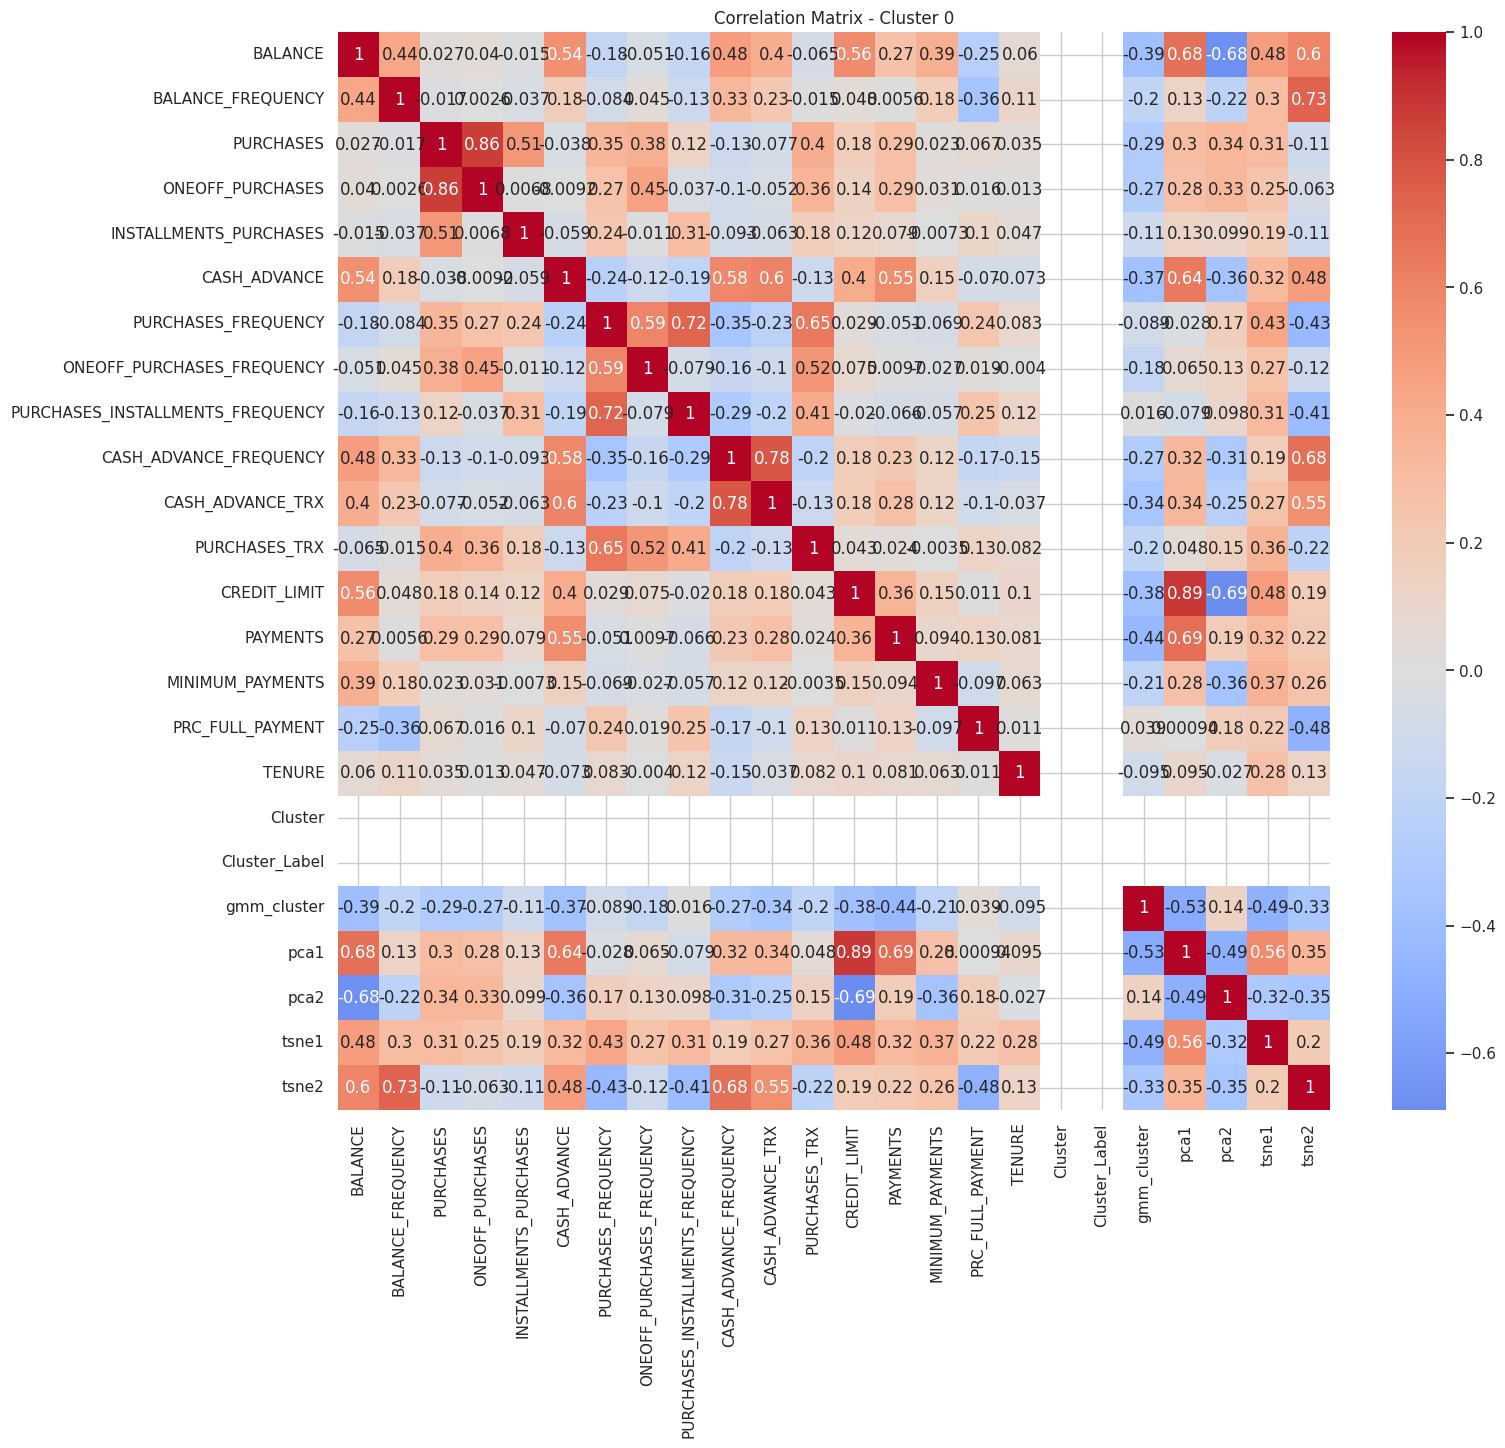

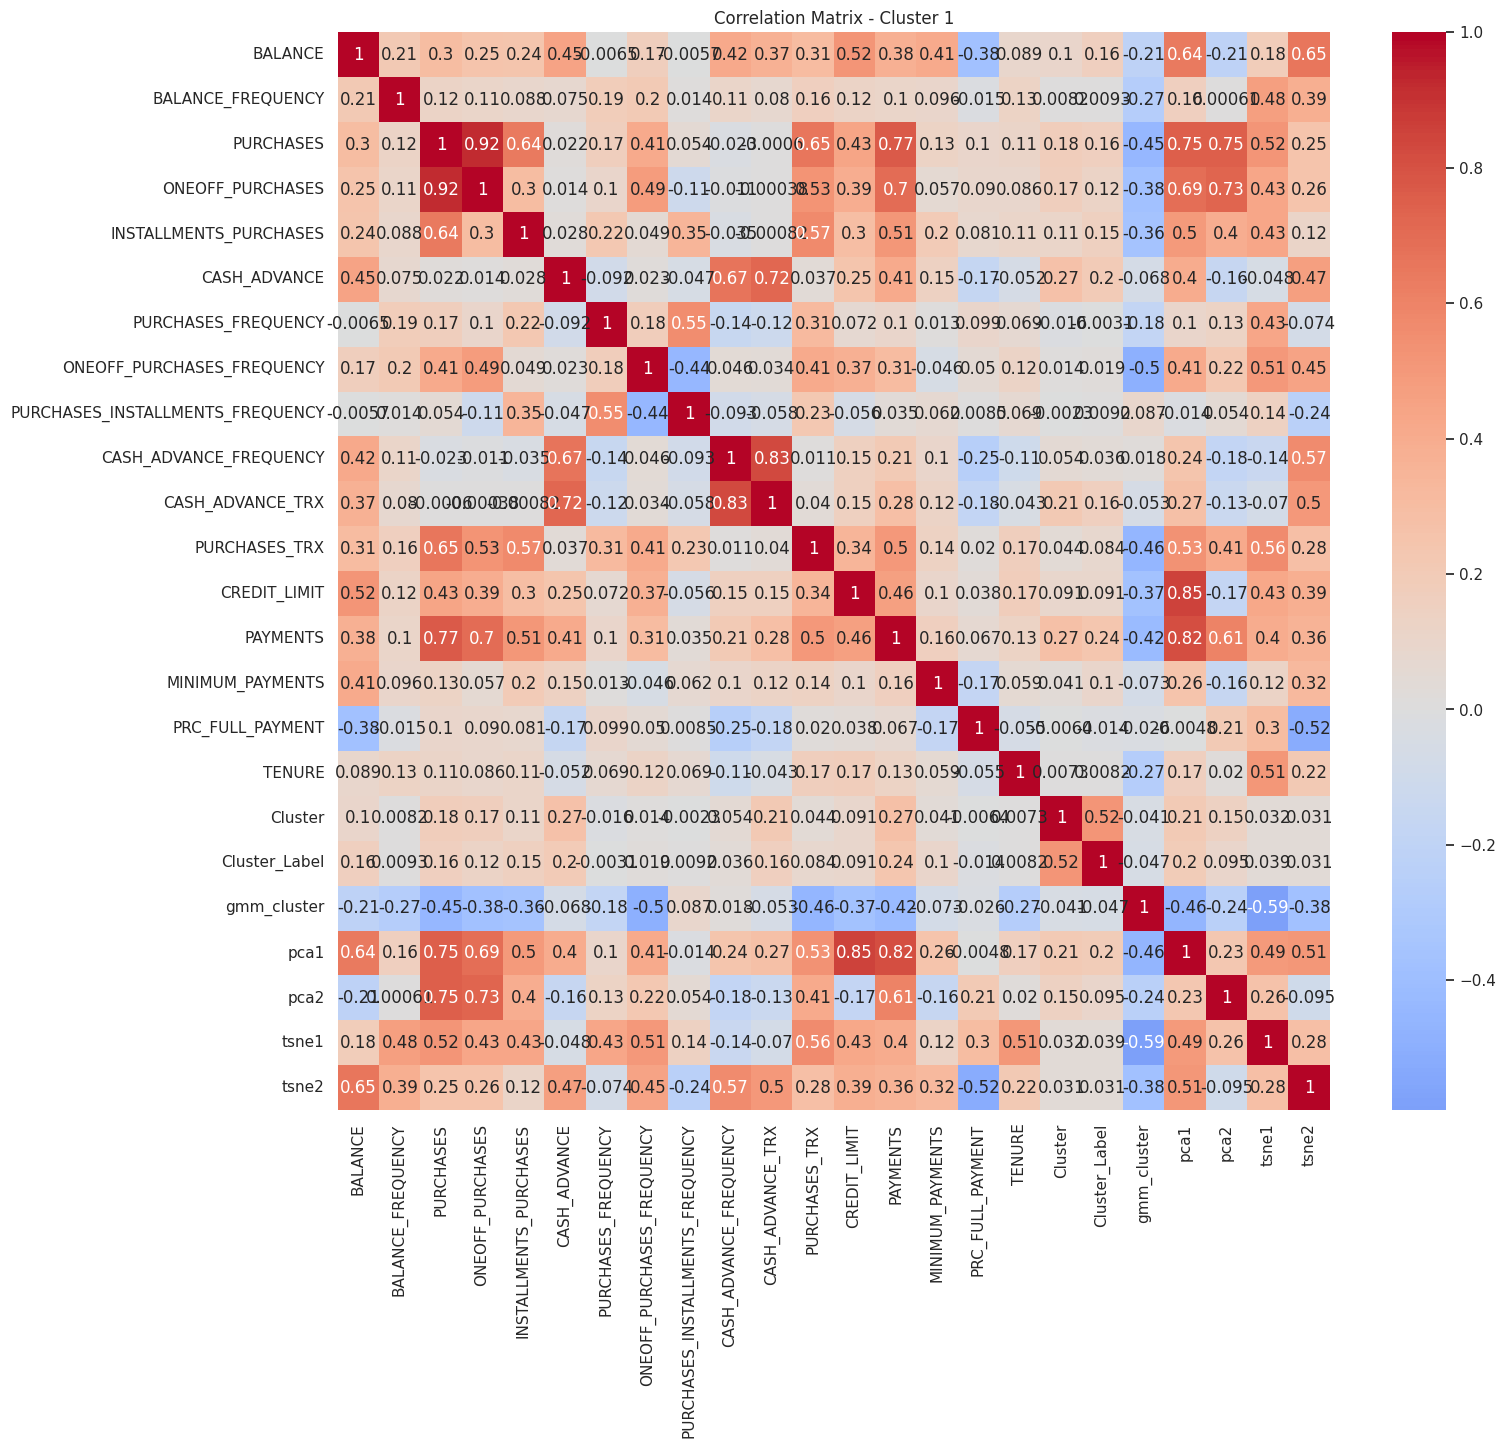

In [ ]:
import seaborn as sns

for cluster in clusters_df['cluster'].unique():
    cluster_data = clusters_df[clusters_df['cluster'] == cluster].drop(columns='cluster')
    plt.figure(figsize=(16, 14))
    sns.heatmap(cluster_data.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Matrix - Cluster {cluster}')
    plt.show()


The correlation matrices for both clusters show that many features are not independent within each cluster. This is especially notable for features directly related to similar aspects (e.g., cash advances, payments, and purchases), which tend to be correlated due to their inherent relationships in the data.

Given this, the independence assumption in GMM is not fully met, especially if you are using spherical or diag covariance types, which assume uncorrelated features within each cluster.








### 3. Cluster Shape and Spread (Covariance Structure)

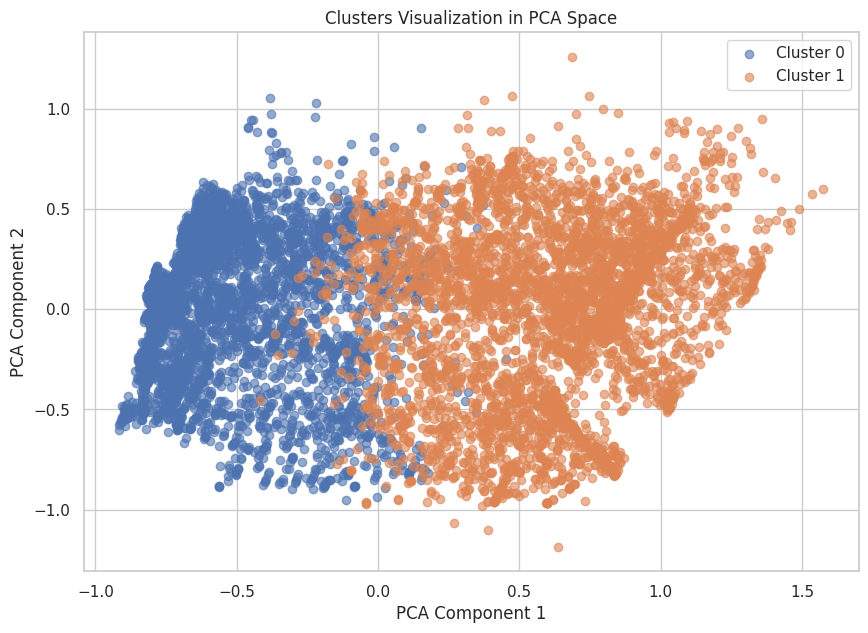

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = gmm_clusters

# Plot clusters in PCA space
plt.figure(figsize=(10, 7))
for cluster in df_pca['cluster'].unique():
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title("Clusters Visualization in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


The clusters have an elliptical shape, which is good, but the overlap indicates that the clusters aren’t as well-defined and separate as GMM ideally assumes. This could impact the effectiveness of the model, especially if the goal is to have distinct, non-overlapping clusters.

### 4. Cluster Weights

In [ ]:
# Calculate the proportion of points in each cluster
cluster_proportions = clusters_df['cluster'].value_counts(normalize=True)

# Compare with the GMM's estimated weights
print("Cluster Proportions based on Data:")
print(cluster_proportions)

print("\nGMM Estimated Weights:")
print(best_gmm.weights_)


Cluster Proportions based on Data:
cluster
0    0.528774
1    0.471226
Name: proportion, dtype: float64

GMM Estimated Weights:
[0.52957806 0.47042194]


The estimated weights and actual proportions align closely. This suggests that GMM is effectively modeling the underlying distribution in terms of cluster sizes

**Reason for Poor performance of GMM:**

The poor performance of GMM, reflected in the low silhouette score, is likely due to the fact that not all of its assumptions are fully satisfied in this dataset. When key assumptions—such as normal distribution of each cluster, feature independence, and clear separation of clusters—are not met, the model may struggle to accurately capture the data structure, leading to suboptimal clustering results.


# **Final Result**

After applying and evaluating K-Means, Gaussian Mixture Model (GMM), and Hierarchical Clustering on the dataset, K-Means emerged as the most effective clustering method, providing the highest silhouette score and well-separated clusters. K-Means achieved optimal results with 4 clusters, which aligned well with the natural grouping in the data, as confirmed by both visualizations and cluster compactness. Unlike GMM and Hierarchical Clustering, which showed considerable overlap and imbalanced cluster sizes, K-Means created distinct and balanced clusters, demonstrating its robustness and suitability for this dataset. Its efficiency, simplicity, and ability to form compact clusters with clear boundaries make K-Means the best choice for this analysis.